In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Shape of A = (480, 720)
k = min(480, 720) = 480


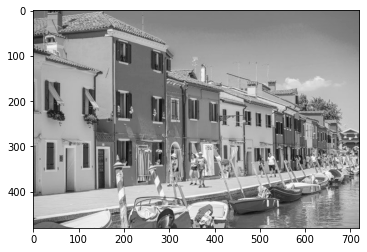

In [2]:
# Load an image file and transform it into a floating point matrix A
x = Image.open('lads_image.jpg')
g = x.convert('L')
A = np.asarray(g.getdata(),dtype=np.float64).reshape((g.size[1],g.size[0]))

plt.imshow(A, cmap=plt.get_cmap('gray'))
print("Shape of A =", np.shape(A))

k = min(np.shape(A)[0], np.shape(A)[1])
print("k = min({}, {}) = {}".format(np.shape(A)[0], np.shape(A)[1], k))

In [3]:
# Compute the SVD A = UΣ(V^T)
u, s, v = np.linalg.svd(A)
print(np.shape(u), np.shape(s), np.shape(v))

(480, 480) (480,) (720, 720)


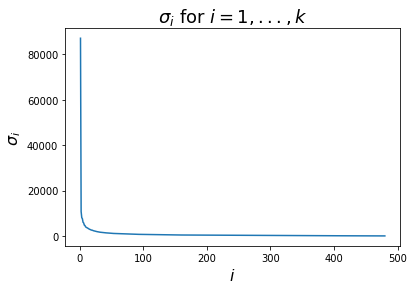

In [4]:
# Plot i vs σ_i with i = 1,...,k
i = np.arange(1, k+1)
plt.plot(i, s)
plt.xlabel(r"$i$" , fontsize=16)
plt.ylabel(r"$\sigma_i$", fontsize=16)
plt.title(r"$\sigma_i$ for $i = 1, ..., k$", fontsize=18)
plt.show()

Computing

$\begin{gather*}A_i = \sum\limits_{j=1}^i \sigma_j \vec{u_j} \vec{v_j}^T\end{gather*}$

for $i=1, ..., k-1$

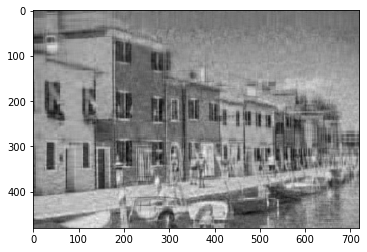

In [13]:
# the image A is of shape (480, 720)

Ai = np.zeros((480,720))
y = []
z = []
for j in range(0, 30):
    suv = np.outer(s[j] *u[:,j], v[j,:])
    Ai = Ai + suv
    
    #y.append(np.abs(np.linalg.norm(Ai - A, ord=2) - s[j+1]))
    #z.append(np.linalg.norm(Ai - A, ord=2))
    
    
# print image Ai
plt.imshow(Ai, cmap=plt.get_cmap('gray'))

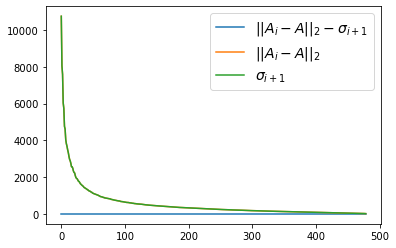

Max of blue curve =  9.094947017729282e-12


In [261]:
plt.plot(np.arange(479), y, label=r"$|| A_i - A ||_2 - \sigma_{i+1}$")
plt.plot(np.arange(479), z, label=r"$|| A_i - A ||_2$")
plt.plot(np.arange(479), s[1:], label=r"$\sigma_{i+1}$")
plt.legend(loc="upper right", prop={'size': 14})
plt.show()
print("Max of blue curve = ",np.max(y))